In [4]:
# Library imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import expon
from scipy.stats import uniform
import time
from scipy.optimize import minimize

In [173]:
# Importing Models
from Models import *

In [11]:
# PARAMETERS

I = 10000
J = 50

b = 5
F = uniform(scale = 1)
G = uniform(scale = 1)
H = uniform(scale = 10)

f = lambda x: F.pdf(x)
g = lambda x: G.pdf(x)

rng = np.random.RandomState(seed=123)         # Set up number generator using seed
V = H.rvs(size=J, random_state=rng)     # Create J-size vector of Vj values using H
V = np.sort(V)

r = 1.5
p = 1/100

R = lambda x: r * x
P = lambda x: p/2 * x**2

dR = lambda x: r + x - x
dP = lambda x: p * x

df = lambda x: -b*f(x)

k0 = np.ones(J)*0.5

λ = 1
t = 1
beta = 0.7

In [174]:
# Some more parameters

ki = F.rvs(size=I, random_state=rng).reshape((1,-1))    # Sample of patients out of distribution
gammai = G.rvs(size=I, random_state=rng).reshape((1,-1))

Vj = V
kj = k0

U_matrix = utility(ki,gammai,kj,Vj,t)
U_column = U_matrix[:,0]
V_example = np.linspace(0.2,10,50)

In [178]:
# TIMING FUNCTIONS

# Module imports for print suppresion
import contextlib
import io

def timing(J, function, H):

    # Initialize the result array
    result = np.zeros((J, 2))

    # Test the function with vector sizes from 1 to 10
    for i in range(J):  # Create a random vector of size i
        start_time = time.time()  # Start the timer
        with contextlib.redirect_stdout(io.StringIO()):
            function(i+1)     # Call the function (print suppressed)
        end_time = time.time()    # End the timer
        
        # Populate the result array
        result[i, 0] = i + 1  # Vector size
        result[i, 1] = end_time - start_time  # Time taken

    return result

def graph_time(n, x, y, **scatter_kwargs):

    def quadratic_fit(x, y):

        def objective(c):
            # c[0] is the quadratic coefficient, c[1] is the linear coefficient
            return np.sum((y - (c[0] * x**2 + c[1] * x))**2)

        # Initial guess for coefficients (c[0], c[1])
        initial_guess = [1, 0]

        # Constraints: c[1] >= 0
        constraints = ({'type': 'ineq', 'fun': lambda c: c[1]})  # Linear coefficient must be non-negative

        result = minimize(objective, initial_guess, constraints=constraints)

        return [result.x[0],result.x[1],0]  # Returns the coefficients (quadratic, linear)

    if n == 1:
        coefs = np.polyfit(x, y, 1)
    elif n == 2:
        coefs = quadratic_fit(x, y)
    else:
        raise ValueError("Choose n = 1 or 2")
    
    fit = np.polyval(coefs, x)

    return plt.plot(x, fit, **scatter_kwargs)

In [133]:
computation_folder = '/Users/leontagle/Documents/TESIS/Thesis-Draft/Computation/'
appendix_folder = '/Users/leontagle/Documents/TESIS/Thesis-Draft/Appendix/'
mpl.rc('font', family='helvetica', size=18) 

In [183]:
Logit_eq_lambda = lambda J: SearchEq(I, F, G, t, λ, R, P, H.rvs(size=J), LogitSearch).Eq_k(np.linspace(0,1,J),2)
Logit_eq = timing(30, Logit_eq_lambda, H)

KeyboardInterrupt: 

In [ ]:
Schnell_eq_lambda = lambda J: SearchEq(I, F, G, t, λ, R, P, H.rvs(size=J), SchnellSearch).Eq_k(np.linspace(0,1,J),2)
Schnell_eq = timing(30, Schnell_eq_lambda, H)

In [169]:
x, logit_eq = Logit_eq[:, 0], Logit_eq[:, 1]
schnell_eq = Schnell_eq[:, 1]


plt.figure(figsize=(8, 5))

plt.scatter(x, logit_eq, color='tab:blue', alpha=0.25, edgecolor='none')
plt.scatter(x, schnell_eq, color='tab:orange', alpha=0.25, edgecolor='none')

graph_time(2, x, logit_eq, color='tab:blue', linewidth=2, label="Logit")
graph_time(2, x, schnell_eq, color='tab:orange', linewidth=2, label="Sequential")

plt.ylim(0, 65)
plt.yticks(np.arange(0, 65, 15))
plt.xlabel("n", fontsize=25, fontdict={'family': 'georgia', 'style': 'italic'})
plt.ylabel("Execution Time (seconds)")
plt.title("")
plt.legend(fontsize=25)
plt.grid(color='lightgrey', linestyle='solid', linewidth=0.5, alpha=0.5)

plt.savefig(computation_folder + 'squared.pdf', format='pdf', bbox_inches='tight')
plt.show()

NameError: name 'Logit_eq' is not defined

In [180]:
Logit_S_lambda = lambda J: SearchEq(I, F, G, t, λ, R, P, H.rvs(size=J), LogitSearch).S(np.linspace(0,1,J))
Logit_S = timing(200, Logit_S_lambda, H)

Schnell_S_lambda = lambda J: SearchEq(I, F, G, t, λ, R, P, H.rvs(size=J), SchnellSearch).S(np.linspace(0,1,J))
Schnell_S = timing(200, Schnell_S_lambda, H)

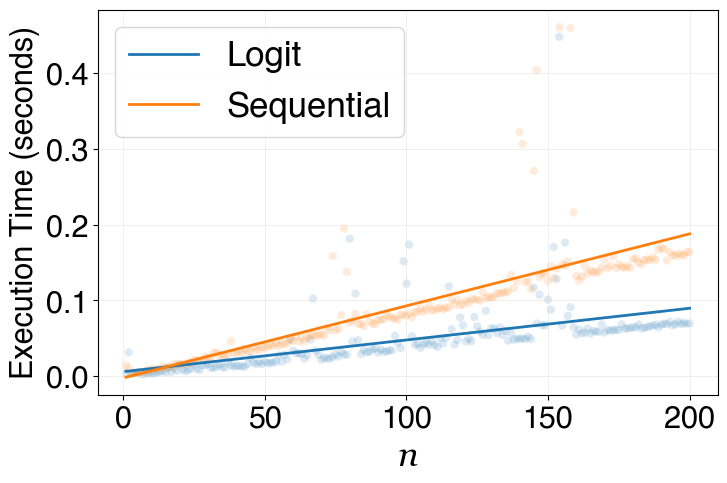

<Figure size 640x480 with 0 Axes>

In [182]:
x, logit_s = Logit_S[:, 0], Logit_S[:, 1]
schnell_s = Schnell_S[:, 1]

plt.figure(figsize=(8, 5))

plt.scatter(x, logit_s, color='tab:blue', alpha=0.15, edgecolor='none')
plt.scatter(x, schnell_s, color='tab:orange', alpha=0.15, edgecolor='none')

graph_time(1, x, logit_s, color='tab:blue', linewidth=2, label="Logit")
graph_time(1, x, schnell_s, color='tab:orange', linewidth=2, label="Sequential")


plt.xlabel("n", fontsize=25, fontdict={'family': 'georgia', 'style': 'italic'})
plt.ylabel("Execution Time (seconds)")
plt.title("")
plt.legend(fontsize=25)
plt.grid(color='lightgrey', linestyle='solid', linewidth=0.5, alpha=0.5)
plt.show()

# Save and show
plt.savefig(computation_folder + 'linear.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [237]:
Logit_eq_lambda_3 = lambda J: SearchEq(I, F, G, t, λ, R, P, H.rvs(size=J), LogitSearch).Eq_k(np.linspace(0,1,J),3)
Logit_eq_3 = timing(30, Logit_eq_lambda_3, H)

Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 4 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 4 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.


In [238]:
Logit_eq_lambda_4 = lambda J: SearchEq(I, F, G, t, λ, R, P, H.rvs(size=J), LogitSearch).Eq_k(np.linspace(0,1,J),4)
Logit_eq_4 = timing(30, Logit_eq_lambda_4, H)

Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 4 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 4 iterations.
Two decimal convergence achieved in 3 iterations.


In [241]:
Logit_eq_lambda_5 = lambda J: SearchEq(I, F, G, t, λ, R, P, H.rvs(size=J), LogitSearch).Eq_k(np.linspace(0,1,J),4)
Logit_eq_5 = timing(30, Logit_eq_lambda_5, H)

Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 4 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 2 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.
Two decimal convergence achieved in 3 iterations.


In [307]:
x, logit_eq = Logit_eq[:, 0], Logit_eq[:, 1]
logit_eq_3 = Logit_eq_3[:, 1]
logit_eq_4 = Logit_eq_4[:, 1]
logit_eq_5 = Logit_eq_5[:, 1]


plt.figure(figsize=(8, 5))

plt.scatter(x, logit_eq, color='tab:blue', alpha=0.25, edgecolor='none')
plt.scatter(x, logit_eq_3, color='tab:cyan', alpha=0.25, edgecolor='none')
plt.scatter(x, logit_eq_4, color='tab:purple', alpha=0.25, edgecolor='none')
plt.scatter(x, logit_eq_5, color='tab:olive', alpha=0.25, edgecolor='none')

graph_time(2, x, logit_eq, color='tab:blue', linewidth=2, label="2 decimals")
graph_time(2, x, logit_eq_3, color='tab:cyan', linewidth=2, label="3 decimals")
graph_time(2, x, logit_eq_4, color='tab:purple', linewidth=2, label="4 decimals")
graph_time(2, x, logit_eq_5, color='tab:olive', linewidth=2, label="5 decimals")

plt.ylim(0, 82)
plt.yticks(np.arange(0, 81, 20))
plt.xlabel("n", fontsize=25, fontdict={'family': 'georgia', 'style': 'italic'})
plt.ylabel("Execution Time (seconds)")
plt.title("")
plt.legend()
plt.grid(color='lightgrey', linestyle='solid', linewidth=0.5, alpha=0.5)

# Save and show
plt.savefig(computation_folder + 'decimals.pdf', format='pdf', bbox_inches='tight')
plt.show()

/var/folders/d9/f39ks_q941961hvlpvd2zymc0000gn/T/ipykernel_12354/2350470432.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [49]:
LogitModel = SearchEq(I, F, G, t, λ, R, P, V, LogitSearch)
SchnellModel = SearchEq(I, F, G, t, beta, R, P, V, SchnellSearch)

np.set_printoptions(suppress=True, precision=4)

<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x1105d5260> at 0x12ae539c0>

In [50]:
SchnellModel.Eq_k(np.zeros(J), 2)

Two decimal convergence achieved in 5 iterations.


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 ,
       0.11, 0.11, 0.12, 0.14, 0.27, 0.37, 0.54, 0.6 , 0.65, 0.67, 0.69,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98])

In [158]:
LogitModel.Eq_k(np.zeros(J), 4)

Two decimal convergence achieved in 4 iterations.


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.41, 0.41, 0.41, 0.49, 0.58,
       0.58, 0.61, 0.61, 0.64, 0.72, 0.74, 0.77, 0.77, 0.77, 0.8 , 0.81,
       0.92, 0.93, 0.95, 0.97, 0.97, 0.97])

In [17]:
k0 = np.zeros(J)
V_example = np.linspace(0.2,10,50)

In [13]:
lambda_values = [1, 0.8, 0.6, 0.4, 0.2, 0.1]

Logit_list = []

for λ in lambda_values:
    k = SearchEq(I, F, G, t, λ, R, P, V_example, LogitSearch).Eq_k(k0, 2)
    Logit_list.append(k)

Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 4 iterations.
Two decimal convergence achieved in 4 iterations.


In [56]:
beta_values = [0.99, 0.9, 0.8, 0.6, 0.4, 0.1]

Schnell_list = []

for beta in beta_values:
    k = SearchEq(I, F, G, t, beta, R, P, V_example, LogitSearch).Eq_k(k0, 4)
    Schnell_list.append(k)

Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 5 iterations.
Two decimal convergence achieved in 4 iterations.


In [55]:
Schnell_list_old = Schnell_list

In [143]:
computation_folder = '/Users/leontagle/Documents/TESIS/Thesis-Draft/Computation/'
mpl.rc('font', family='Helvetica', size=22)

import seaborn as sns
sns.set_palette("tab10")

In [16]:
k_0 = np.zeros(J)
k_1 = np.ones(J)

In [17]:
def setup_plot():
    # Remove the box (spines)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # Remove ticks
  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

    # Set limits
    plt.xlim(0, )
    plt.ylim(0, )

    # Grid
    plt.grid(color='lightgrey', linestyle='solid', linewidth=1)

    # Add legend
    plt.legend()

    # Add arrows for the axes
    plt.annotate('', xy=(1, 0), xytext=(0, 0),
                 xycoords='axes fraction', textcoords='axes fraction',
                 arrowprops=dict(arrowstyle="->", color='black', lw=1))
    plt.annotate('', xy=(0, 1), xytext=(0, 0),
                 xycoords='axes fraction', textcoords='axes fraction',
                 arrowprops=dict(arrowstyle="->", color='black', lw=1))

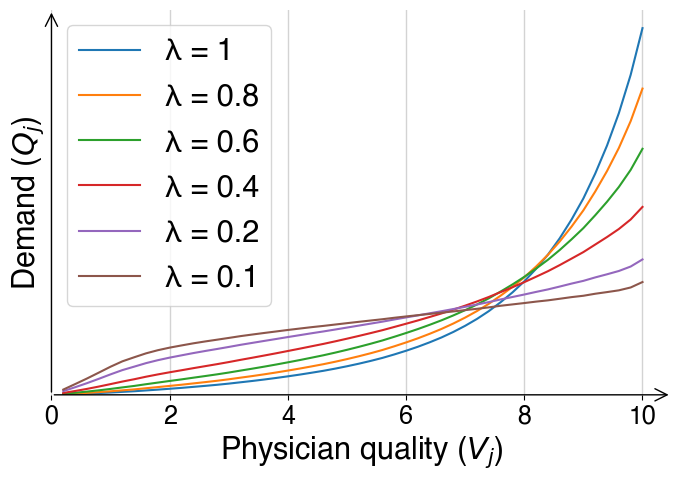

In [147]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Logit_list):
    λ = lambda_values[i]
    y = SearchEq(I, F, G, t, λ, R, P, V_example, LogitSearch).Q(k_0)
    plt.plot(x, y, label=f'λ = {λ}')

setup_plot()

plt.xticks(fontsize=18)

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Demand ($Q_j$)')

plt.savefig(computation_folder + 'Q_zero.pdf', format='pdf', bbox_inches='tight')
plt.show()

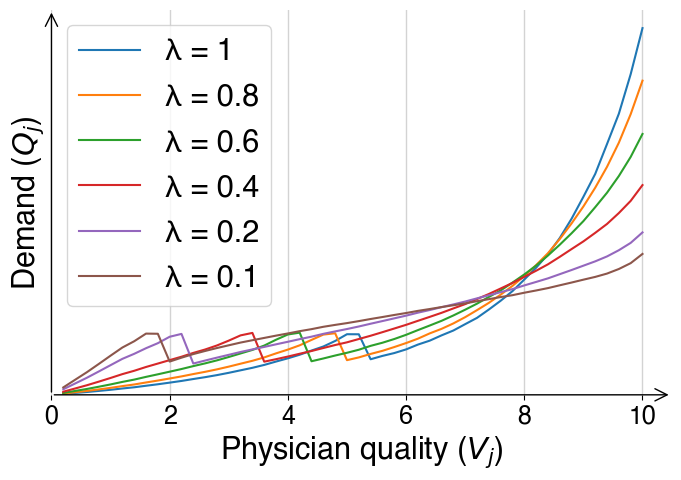

In [148]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Logit_list):
    λ = lambda_values[i]
    y = SearchEq(I, F, G, t, λ, R, P, V_example, LogitSearch).Q(k)
    plt.plot(x, y, label=f'λ = {λ}')

setup_plot()

plt.xticks(fontsize=18)

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Demand ($Q_j$)')

plt.savefig(computation_folder + 'Q_eq.pdf', format='pdf', bbox_inches='tight')
plt.show()

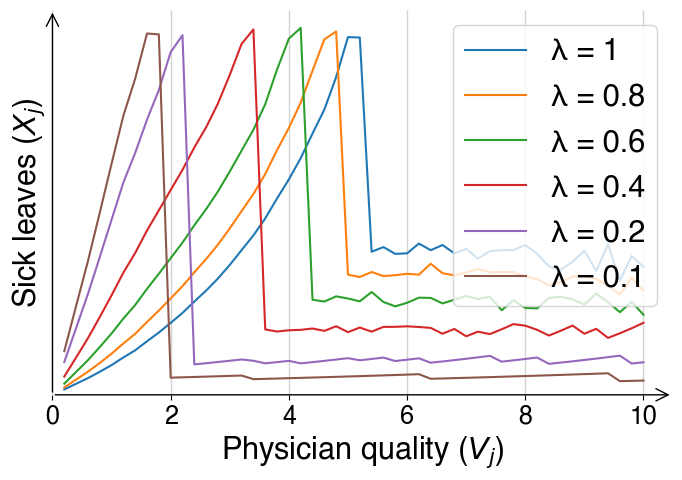

In [149]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Logit_list):
    λ = lambda_values[i]
    y = SearchEq(I, F, G, t, λ, R, P, V_example, LogitSearch).X(k)
    plt.plot(x, y, label=f'λ = {λ}')

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Sick leaves ($X_j$)')

plt.xticks(fontsize=18)

plt.savefig(computation_folder + 'X.pdf', format='pdf', bbox_inches='tight')
plt.show()

<Figure size 1000x500 with 0 Axes>

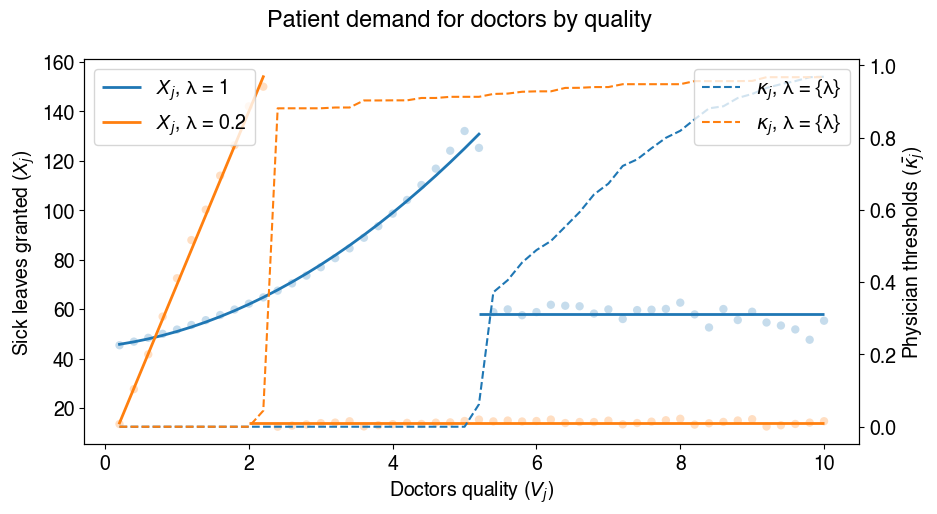

In [266]:
mpl.rc('font', family='Helvetica', size=14)

# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(10, 5))

i_list = [0, 4]
colors = ['tab:blue', 'tab:orange']

i = 0    
λ = lambda_values[i]
k = Logit_list[i]

# Calculate y values with SearchEq
y = SearchEq(I, F, G, t, λ, R, P, V_example, LogitSearch).X(k)[0:26]
x_short = x[0:26]

coefs = [2.5, 3.5, 45]
fit = np.polyval(coefs, x_short)

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

for t, i in enumerate(i_list):
    λ = lambda_values[i]
    k = Logit_list[i]
    
    # Calculate y values with SearchEq
    y = SearchEq(I, F, G, t, λ, R, P, V_example, LogitSearch).X(k)
    
    # Plot line with dashed style on the main y-axis
    ax1.scatter(x, y, color=colors[t], alpha = 0.25, edgecolor='none')
    ax2.plot(x, k, label=r'$κ_j$, λ = {λ}', linestyle='dashed', color=colors[t])

ax1.hlines(y=58, xmin=5.2, xmax=10, color='tab:blue', linewidth=2, label=f'$X_j$, λ = {lambda_values[0]}')
ax1.hlines(y=14, xmin=2, xmax=10, color='tab:orange', linewidth=2, label=f'$X_j$, λ = {lambda_values[4]}')
ax1.plot(x_short, fit, linewidth=2, color='tab:blue')
ax1.plot(x[0:11], 70*x[0:11], linewidth=2, color='tab:orange')

# Labels and titles
ax1.set_xlabel('Doctors quality ($V_j$)')
ax1.set_ylabel(r'Sick leaves granted ($X_j$)', color='black')
ax2.set_ylabel(r'Physician thresholds ($\bar{\kappa_j}$)', color='black')  # Customize as needed

# Legends for each y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Main title
plt.suptitle('Patient demand for doctors by quality')

# Display the plot
plt.show()

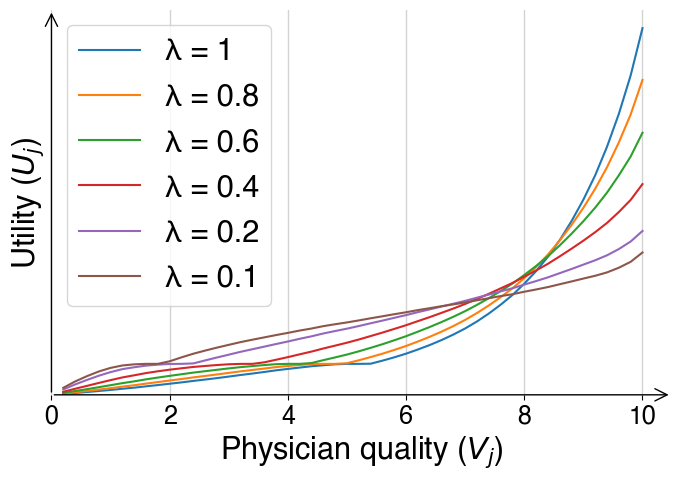

In [150]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Logit_list):
    λ = lambda_values[i]
    y = SearchEq(I, F, G, t, λ, R, P, V_example, LogitSearch).utility(k)
    plt.plot(x, y, label=f'λ = {λ}')

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Utility ($U_j$)')

plt.xticks(fontsize=18)

plt.savefig(appendix_folder + 'U.pdf', format='pdf', bbox_inches='tight')
plt.show()

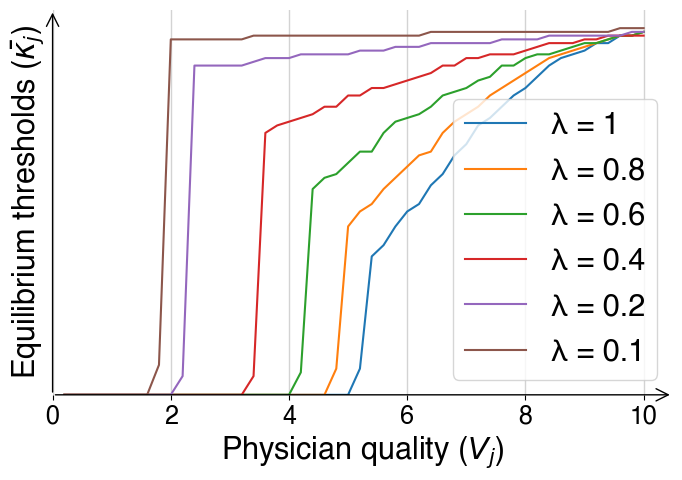

In [156]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Logit_list):
    λ = lambda_values[i]
    plt.plot(x, k, label=f'λ = {λ}')

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Equilibrium thresholds ($\bar{\kappa_j}$)')

plt.xticks(fontsize=18)

plt.legend(loc='lower right')

plt.savefig(computation_folder + 'ks.pdf', format='pdf', bbox_inches='tight')
plt.show()

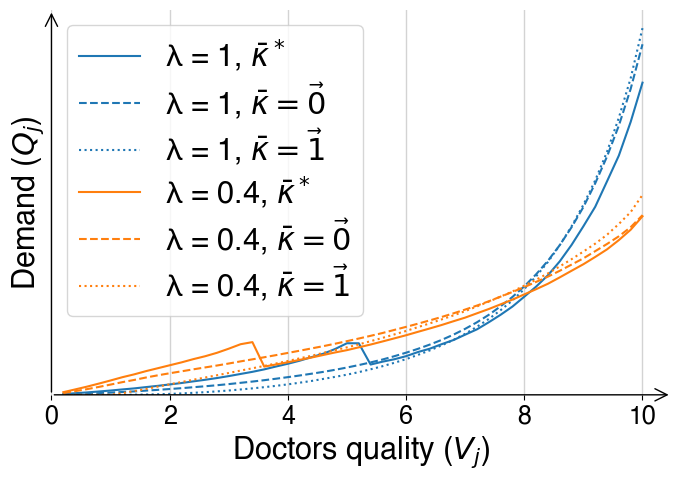

In [157]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))
colors = ['tab:blue', 'tab:orange']


y_1a = SearchEq(I, F, G, t, lambda_values[0], R, P, V_example, LogitSearch).Q(Logit_list[0])
y_1b = SearchEq(I, F, G, t, lambda_values[0], R, P, V_example, LogitSearch).Q(k_0)
y_1c = SearchEq(I, F, G, t, lambda_values[0], R, P, V_example, LogitSearch).Q(k_1)
plt.plot(x, y_1a, label=fr'λ = {lambda_values[0]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors[0])
plt.plot(x, y_1b, label=fr'λ = {lambda_values[0]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors[0])
plt.plot(x, y_1c, label=fr'λ = {lambda_values[0]}, $\bar{{\kappa}} = \vec{1}$', linestyle = 'dotted', color=colors[0])

y_1a = SearchEq(I, F, G, t, lambda_values[3], R, P, V_example, LogitSearch).Q(Logit_list[3])
y_1b = SearchEq(I, F, G, t, lambda_values[3], R, P, V_example, LogitSearch).Q(k_0)
y_1c = SearchEq(I, F, G, t, lambda_values[3], R, P, V_example, LogitSearch).Q(k_1)
plt.plot(x, y_1a, label=fr'λ = {lambda_values[3]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors[1])
plt.plot(x, y_1b, label=fr'λ = {lambda_values[3]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors[1])
plt.plot(x, y_1c, label=fr'λ = {lambda_values[3]}, $\bar{{\kappa}} = \vec{1}$', linestyle = 'dotted', color=colors[1])

setup_plot()

plt.legend(labelspacing=0.2)

plt.xlabel(r'Doctors quality ($V_j$)')
plt.ylabel(r'Demand ($Q_j$)')

plt.xticks(fontsize=18)

plt.savefig(appendix_folder + 'Q_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()

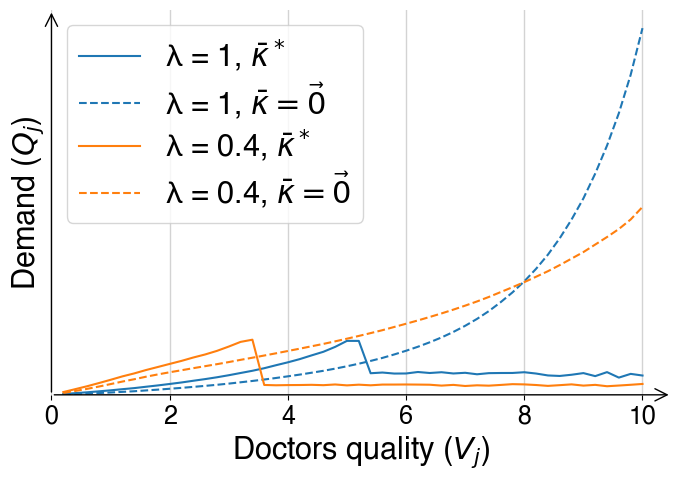

In [158]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))
colors = ['tab:blue', 'tab:orange']


y_1a = SearchEq(I, F, G, t, lambda_values[0], R, P, V_example, LogitSearch).X(Logit_list[0])
y_1b = SearchEq(I, F, G, t, lambda_values[0], R, P, V_example, LogitSearch).X(k_0)
y_1c = SearchEq(I, F, G, t, lambda_values[0], R, P, V_example, LogitSearch).X(k_1)
plt.plot(x, y_1a, label=fr'λ = {lambda_values[0]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors[0])
plt.plot(x, y_1b, label=fr'λ = {lambda_values[0]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors[0])

y_1a = SearchEq(I, F, G, t, lambda_values[3], R, P, V_example, LogitSearch).X(Logit_list[3])
y_1b = SearchEq(I, F, G, t, lambda_values[3], R, P, V_example, LogitSearch).X(k_0)
y_1c = SearchEq(I, F, G, t, lambda_values[3], R, P, V_example, LogitSearch).X(k_1)
plt.plot(x, y_1a, label=fr'λ = {lambda_values[3]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors[1])
plt.plot(x, y_1b, label=fr'λ = {lambda_values[3]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors[1])

setup_plot()

plt.legend(labelspacing=0.2)

plt.xlabel(r'Doctors quality ($V_j$)')
plt.ylabel(r'Demand ($Q_j$)')

plt.xticks(fontsize=18)

plt.savefig(appendix_folder + 'X_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [38]:
Schnell_v2 = Schnell_list
del Schnell_v2[-2]

beta_values = beta_values = [0.99, 0.9, 0.8, 0.6, 0.4, 0.1]


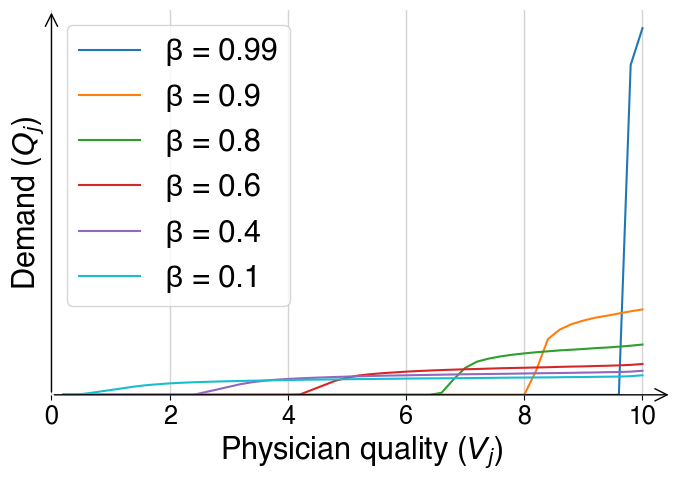

In [159]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

tableau7 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 'tab:cyan']


for i, k in enumerate(Schnell_list):
    beta = beta_values[i]
    y = SearchEq(I, F, G, t, beta, R, P, V_example, SchnellSearch).Q(k_0)
    plt.plot(x, y, label=f'β = {beta}', color=tableau7[i])

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Demand ($Q_j$)')

plt.xticks(fontsize=18)

plt.savefig(computation_folder + 'schnell_Q_0.pdf', format='pdf', bbox_inches='tight')
plt.show()

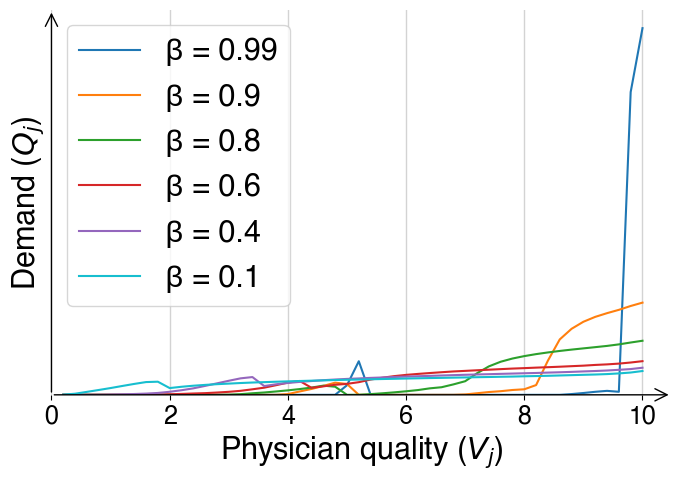

In [160]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Schnell_list):
    beta = beta_values[i]
    y = SearchEq(I, F, G, t, beta, R, P, V_example, SchnellSearch).Q(k)
    plt.plot(x, y, label=f'β = {beta}', color=tableau7[i])

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Demand ($Q_j$)')

plt.xticks(fontsize=18)

plt.savefig(computation_folder + 'schnell_Q_eq.pdf', format='pdf', bbox_inches='tight')
plt.show()

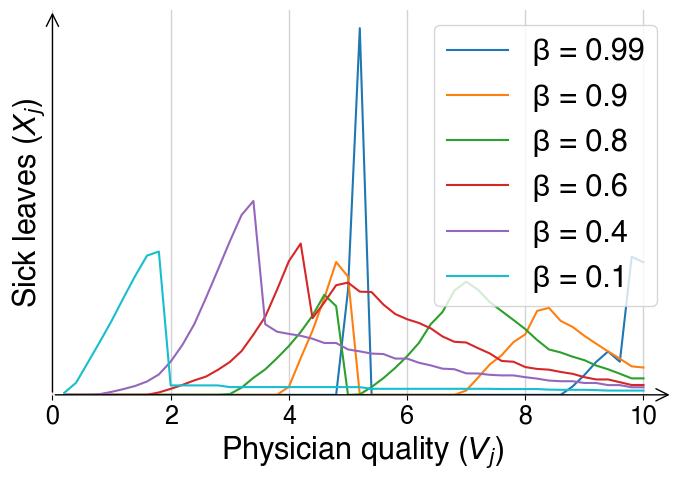

In [161]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Schnell_list):
    beta = beta_values[i]
    y = SearchEq(I, F, G, t, beta, R, P, V_example, SchnellSearch).X(k)
    plt.plot(x, y, label=f'β = {beta}', color=tableau7[i])

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Sick leaves ($X_j$)')

plt.xticks(fontsize=18)

plt.savefig(computation_folder + 'schnell_X.pdf', format='pdf', bbox_inches='tight')
plt.show()

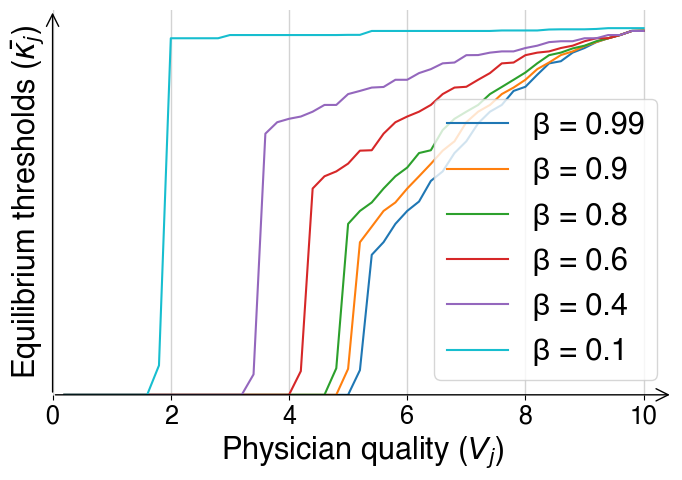

In [163]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Schnell_list):
    beta = beta_values[i]
    plt.plot(x, k, label=f'β = {beta}', color=tableau7[i])

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Equilibrium thresholds ($\bar{\kappa_j}$)')

plt.xticks(fontsize=18)
plt.legend(loc='lower right')

plt.savefig(computation_folder + 'schnell_ks.pdf', format='pdf', bbox_inches='tight')
plt.show()

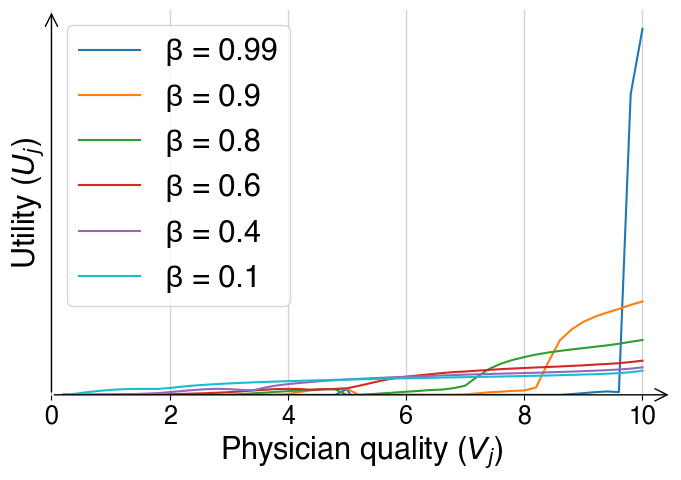

In [164]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Schnell_list):
    beta = beta_values[i]
    y = SearchEq(I, F, G, t, beta, R, P, V_example, SchnellSearch).utility(k)
    plt.plot(x, y, label=f'β = {beta}', color=tableau7[i])

setup_plot()

plt.xlabel(r'Physician quality ($V_j$)')
plt.ylabel(r'Utility ($U_j$)')

plt.xticks(fontsize=18)

plt.savefig(appendix_folder + 'schnell_U.pdf', format='pdf', bbox_inches='tight')
plt.show()

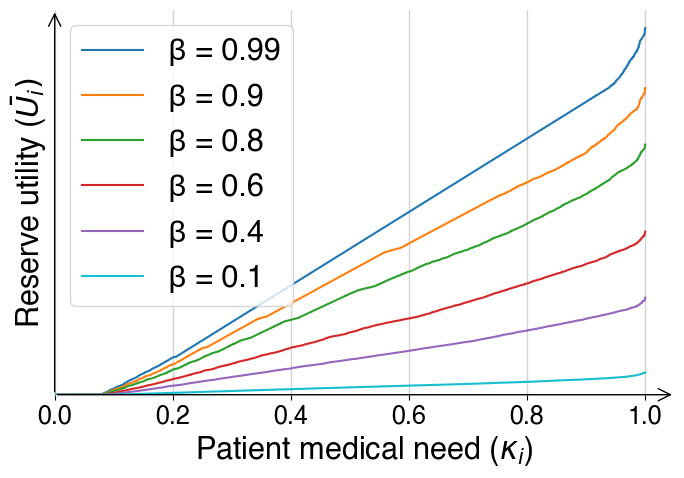

In [165]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))

for i, k in enumerate(Schnell_list):
    beta = beta_values[i]
    u_roots = SchnellSearch(ki,gammai,k,V_example,t,beta).U_root()
    x = np.sort(ki.reshape(10000))
    y = np.sort(u_roots)
    plt.plot(x, y, label=f'β = {beta}', color=tableau7[i])

setup_plot()

plt.xlabel(r'Patient medical need ($\kappa_i$)')
plt.ylabel(r'Reserve utility ($\bar{U_i})$')

plt.xticks(fontsize=18)

plt.savefig(computation_folder + 'patient_uroot.pdf', format='pdf', bbox_inches='tight')
plt.show()

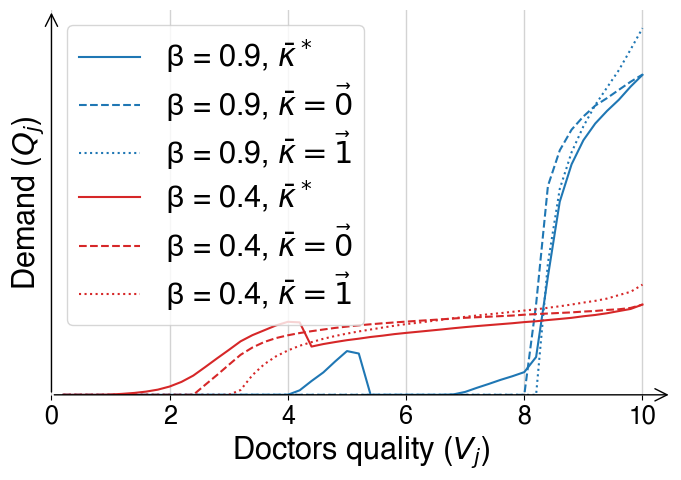

In [166]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))
colors_schnell = ['tab:red','tab:blue']


y_1a = SearchEq(I, F, G, t, beta_values[1], R, P, V_example, SchnellSearch).Q(Schnell_list[0])
y_1b = SearchEq(I, F, G, t, beta_values[1], R, P, V_example, SchnellSearch).Q(k_0)
y_1c = SearchEq(I, F, G, t, beta_values[1], R, P, V_example, SchnellSearch).Q(k_1)
plt.plot(x, y_1a, label=fr'β = {beta_values[1]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors_schnell[1])
plt.plot(x, y_1b, label=fr'β = {beta_values[1]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors_schnell[1])
plt.plot(x, y_1c, label=fr'β = {beta_values[1]}, $\bar{{\kappa}} = \vec{1}$', linestyle = 'dotted', color=colors_schnell[1])


y_1a = SearchEq(I, F, G, t, beta_values[4], R, P, V_example, SchnellSearch).Q(Schnell_list[3])
y_1b = SearchEq(I, F, G, t, beta_values[4], R, P, V_example, SchnellSearch).Q(k_0)
y_1c = SearchEq(I, F, G, t, beta_values[4], R, P, V_example, SchnellSearch).Q(k_1)
plt.plot(x, y_1a, label=fr'β = {beta_values[4]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors_schnell[0])
plt.plot(x, y_1b, label=fr'β = {beta_values[4]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors_schnell[0])
plt.plot(x, y_1c, label=fr'β = {beta_values[4]}, $\bar{{\kappa}} = \vec{1}$', linestyle = 'dotted', color=colors_schnell[0])

setup_plot()

plt.legend(labelspacing=0.2)

plt.xlabel(r'Doctors quality ($V_j$)')
plt.ylabel(r'Demand ($Q_j$)')

plt.xticks(fontsize=18)

plt.savefig(appendix_folder + 'schnell_Q_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()

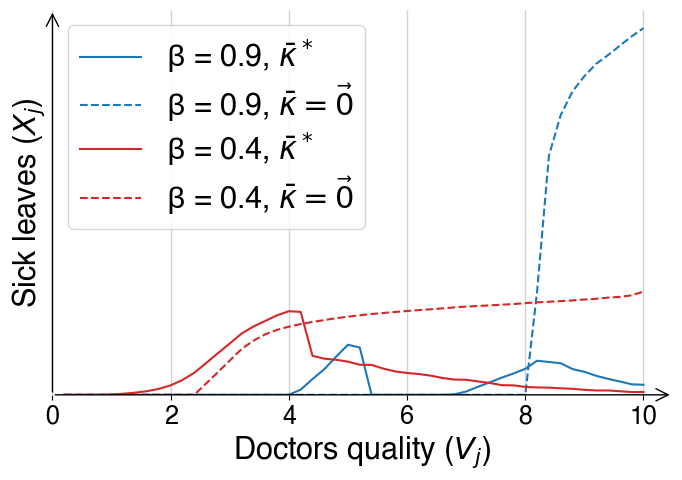

In [168]:
# Loop over lambda values and plot directly
x = V_example

plt.figure(figsize=(8, 5))
colors_schnell = ['tab:red','tab:blue']


y_1a = SearchEq(I, F, G, t, beta_values[1], R, P, V_example, SchnellSearch).X(Schnell_list[0])
y_1b = SearchEq(I, F, G, t, beta_values[1], R, P, V_example, SchnellSearch).X(k_0)
y_1c = SearchEq(I, F, G, t, beta_values[1], R, P, V_example, SchnellSearch).X(k_1)
plt.plot(x, y_1a, label=fr'β = {beta_values[1]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors_schnell[1])
plt.plot(x, y_1b, label=fr'β = {beta_values[1]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors_schnell[1])


y_1a = SearchEq(I, F, G, t, beta_values[4], R, P, V_example, SchnellSearch).X(Schnell_list[3])
y_1b = SearchEq(I, F, G, t, beta_values[4], R, P, V_example, SchnellSearch).X(k_0)
y_1c = SearchEq(I, F, G, t, beta_values[4], R, P, V_example, SchnellSearch).X(k_1)
plt.plot(x, y_1a, label=fr'β = {beta_values[4]}, $\bar{{\kappa}}^*$', linestyle = 'solid', color=colors_schnell[0])
plt.plot(x, y_1b, label=fr'β = {beta_values[4]}, $\bar{{\kappa}} = \vec{0}$', linestyle = 'dashed', color=colors_schnell[0])

setup_plot()

plt.legend(labelspacing=0.2)

plt.xlabel(r'Doctors quality ($V_j$)')
plt.ylabel(r'Sick leaves ($X_j$)')

plt.xticks(fontsize=18)

plt.savefig(appendix_folder + 'schnell_X_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [83]:
def graph_component_i(f, k_original, i_values, start, stop, num_points=50):
    """
    Function to graph the effect of changing specific components of a vector on the output of a function.

    Parameters:
    - f: The function to evaluate.
    - k_original: The original input vector.
    - i_values: A list of indices of the components to change (e.g., [1, 10, 20, 30, 40]).
    - start: The start value for the components.
    - stop: The stop value for the components.
    - num_points: The number of points in the linspace (default is 100).

    Returns:
    - A plot of f(k) as the selected components of k change.
    """
    # Check if k_original has enough elements for the highest index in i_values
    if len(k_original) < max(i_values) + 1:
        raise ValueError("Input vector must be large enough to accommodate all indices in i_values.")

    # Generate a linspace for the components
    linspace_values = np.linspace(start, stop, num_points)
    
    # Keep the original vector unchanged for components not in i_values
    k_fixed = np.copy(k_original)
    
    # Plot results for each index in i_values
    for i in i_values:
        # Store the results of the function evaluations for this component
        results = []
        
        # Evaluate the function over the linspace
        for value in linspace_values:
            k_fixed[i] = value  # Update the i-th component
            result = f(k_fixed)[i]  # Evaluate the function (assumes f returns a vector)
            results.append(result)
        
        # Plot the results for this component
        plt.plot(linspace_values, results, label=f'Doctor {i+1}')
    
    # Customize the plot
    plt.title("Function evaluation over varying components")
    plt.xlabel("Component value")
    plt.ylabel("f(k)")
    plt.grid(True)
    plt.legend()
    plt.show()


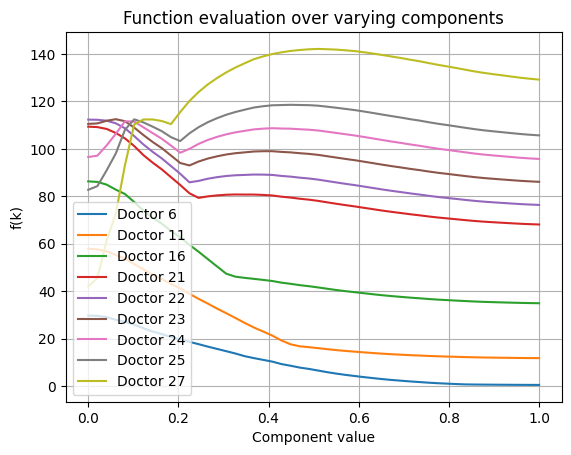

In [113]:
funktion = lambda x: SearchEq(I, F, G, t, 0.8, R, P, V_example, LogitSearch).utility(x)
graph_component_i(funktion, k_main, [5,10,15,20,21,22,23,24,26], 0, 1, num_points=50)

In [102]:
k2[24]

np.float64(0.0)

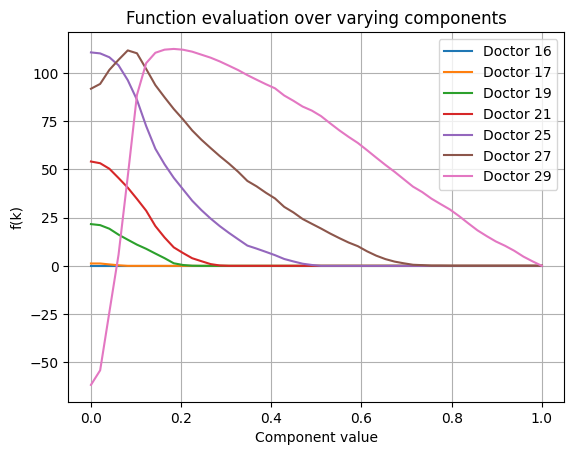

In [105]:
funktion = lambda x: SearchEq(I, F, G, t, 0.8, R, P, V_example, SchnellSearch).utility(x)
graph_component_i(funktion, k2, [15,16,18,20,24,26,28], 0, 1, num_points=50)

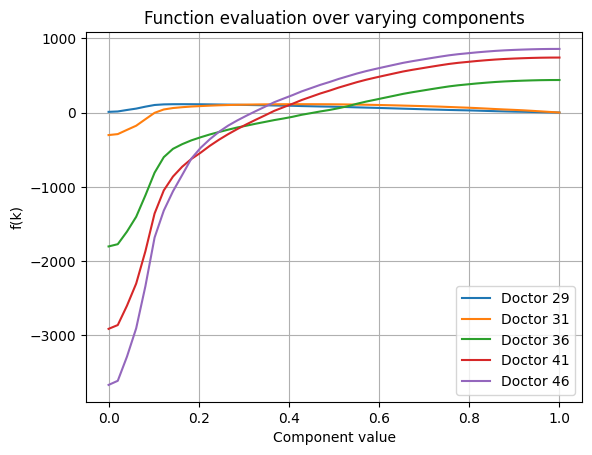

In [107]:
graph_component_i(funktion, k2, [28,30,35,40,45], 0, 1, num_points=50)